In [1]:
#Import all librarys
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

#!pip install tensorflow
#!pip install gensim

Mounted at /content/drive


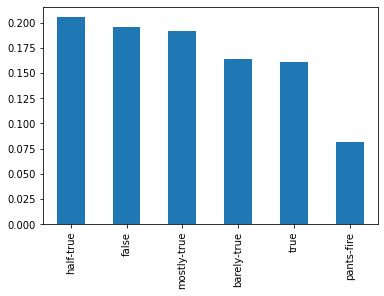

In [2]:
#Loading Data
data = pd.read_csv('/content/drive/MyDrive/train.tsv', header = None, delimiter='\t')
data.columns = ['id', 'label', 'news_text', 'subject', 'speaker', 'spearker_job', 'state', 'affiliation', 
                'barely_true', 'false', 'half_true', 'mostly_true', 'pants_on_fire','context']

data.loc[data['label'].isin(["true", "half-true","mostly-true"]), 'class'] = 'True'
data.loc[data['label'].isin(["false", "barely-true","pants-fire"]), 'class'] = 'False'

data.label.value_counts(normalize=True).head(10).plot.bar()

In [3]:
#Sample Data
data.head()

,id,label,news_text,subject,speaker,spearker_job,state,affiliation,barely_true,false,half_true,mostly_true,pants_on_fire,context,class
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,False
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,True
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,True
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,False
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,True


In [4]:
#Counting by Subjects 

subject = data.subject.str.split(",", n = 20, expand = True) 
subject.head

subject_new = subject[0].append(subject[1]).reset_index(drop=True)
for i in range(1, 20):
    subject_new = subject_new.append(subject[i]).reset_index(drop=True)
subject_new.head
subject_new.columns=["subject"]
for key,count in subject_new.value_counts().iteritems():
    print(f"{key}:\t{count}")


health-care:	1775
economy:	1669
taxes:	1571
jobs:	1289
federal-budget:	1267
state-budget:	1240
education:	1099
elections:	926
candidates-biography:	867
immigration:	812
foreign-policy:	767
history:	704
crime:	679
environment:	609
legal-issues:	599
energy:	585
military:	544
guns:	511
job-accomplishments:	489
terrorism:	485
criminal-justice:	463
message-machine-2012:	459
transportation:	455
state-finances:	424
workers:	416
pundits:	393
public-health:	364
states:	361
message-machine:	358
medicare:	350
women:	338
deficit:	328
voting-record:	320
stimulus:	318
labor:	317
abortion:	313
income:	304
corrections-and-updates:	302
government-regulation:	302
poverty:	293
congress:	281
ethics:	271
government-efficiency:	262
children:	261
campaign-finance:	245
religion:	229
city-government:	225
climate-change:	223
polls:	216
corporations:	209
public-safety:	203
social-security:	201
families:	200
iraq:	198
market-regulation:	189
debt:	180
gays-and-lesbians:	179
financial-regulation:	175
homeland-secur

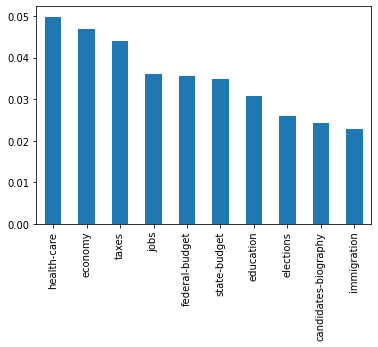

In [5]:
subject_new=pd.DataFrame(subject_new)
subject_new[0].value_counts(normalize=True).head(10).plot.bar()

In [6]:
subject_new.columns=["subject"]
subject_new.head(10)

,subject
0,abortion
1,energy
2,foreign-policy
3,health-care
4,economy
5,education
6,candidates-biography
7,ethics
8,jobs
9,energy


### Remove punctuation

In [7]:
import re
import string

def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', text)
    return text_nopunct
data['Text_Clean'] = data['news_text'].apply(lambda x: remove_punct(x))

### Tokenisation

In [8]:
from nltk import word_tokenize
import nltk

nltk.download('punkt')
tokens = [word_tokenize(sen) for sen in data.Text_Clean]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Convert to lower

In [9]:

def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens]

### Removing stop words

In [10]:

nltk.download('stopwords')
from nltk.corpus import stopwords
stoplist = stopwords.words('english')
def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]

filtered_words = [removeStopWords(sen) for sen in lower_tokens]
data['Text_Final'] = [' '.join(sen) for sen in filtered_words]
data['tokens'] = filtered_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, 
                                         test_size=0.10, 
                                         random_state=42)

In [12]:
data_true = data.loc[data['class'] == 'True']
data_false = data.loc[data['class'] == 'False']

## Term frequencies

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

co = CountVectorizer(stop_words=stoplist)
counts = co.fit_transform(data['Text_Clean'])
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(10)


,0
says,2978
percent,1497
state,1014
obama,878
tax,828
health,776
years,766
president,741
people,735
year,687


In [14]:
co = CountVectorizer(ngram_range=(2,2),stop_words=stoplist)
counts = co.fit_transform(data['Text_Clean'])
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(10)

,0
health care,528
united states,356
barack obama,354
hillary clinton,202
president barack,201
social security,161
donald trump,149
president obama,148
health insurance,132
mitt romney,132


## Text length distribution

count    12791.000000
mean        17.991947
std          8.765078
min          2.000000
25%         12.000000
50%         17.000000
75%         22.000000
max        302.000000
Name: news_text, dtype: float64


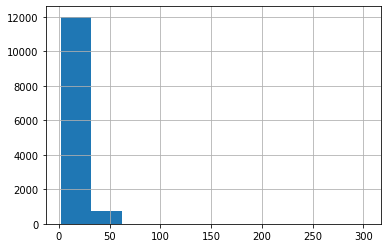

In [15]:
lens = data['news_text'].str.split(" ").apply(lambda x: len(x))
print(lens.describe())
lens.hist()

## Word Cloud

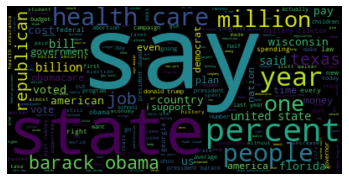

In [16]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud().generate(data['Text_Final'].str.cat(sep=" "))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

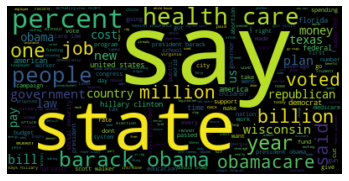

In [18]:
#Word Cloud For Fake Data
wordcloud = WordCloud().generate(data_false['Text_Final'].str.cat(sep=" "))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

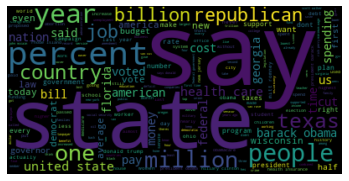

In [19]:
#Word Cloud for Non Fake
wordcloud = WordCloud().generate(data_true['Text_Final'].str.cat(sep=" "))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
all_training_words = [word for tokens in data_train["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

127809 words total, with a vocabulary size of 14072
Max sentence length is 344


In [21]:
all_test_words = [word for tokens in data_test["tokens"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test["tokens"]]
TEST_VOCAB = sorted(list(set(all_test_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_test_words), len(TEST_VOCAB)))
print("Max sentence length is %s" % max(test_sentence_lengths))

14260 words total, with a vocabulary size of 4505
Max sentence length is 47


In [22]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import KeyedVectors

from gensim.models import Word2Vec

!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
!gunzip GoogleNews-vectors-negative300.bin.gz
word2vec = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)


--2021-01-05 02:35:14--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.136.174
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.136.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  68.5MB/s    in 27s     

2021-01-05 02:35:41 (57.5 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [23]:
EMBEDDING_DIM=300


#Converting X to format acceptable by gensim, removing annd punctuation stopwords in the process
X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in data['Text_Clean'].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    X.append(tmp)
    


In [24]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)


X = tokenizer.texts_to_sequences(X)


maxlen = 700 
X = pad_sequences(X, maxlen=maxlen)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1

#len(X[0])


In [25]:
import numpy as np

embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    try:
        embedding_vector = word2vec[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)


# LSTM

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, Conv2D, MaxPool1D, MaxPooling2D, Flatten

model = Sequential()
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Conv1D(128, 5, activation='relu'))
#model.add(Conv1D(activation='relu', filters=4, kernel_size=5))
model.add(MaxPool1D())
model.add(LSTM(units=128))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 700, 300)          4441800   
_________________________________________________________________
conv1d (Conv1D)              (None, 696, 128)          192128    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 348, 128)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 4,766,813
Trainable params: 325,013
Non-trainable params: 4,441,800
________________________________________

In [28]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
#print(data['label'].values)
encoder = preprocessing.LabelEncoder()
Y = encoder.fit_transform(data['class'].values)
X_train, X_test, y_train, y_test = train_test_split(X, Y) 
print(y_train.shape)
print(y_test.shape)

(9593,)
(3198,)


In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=40)

Epoch 1/40
210/210 [==============================] - 166s 782ms/step - loss: 0.0000e+00 - accuracy: 0.4512 - val_loss: 0.0000e+00 - val_accuracy: 0.4437
Epoch 2/40
210/210 [==============================] - 161s 769ms/step - loss: 0.0000e+00 - accuracy: 0.4408 - val_loss: 0.0000e+00 - val_accuracy: 0.4437
Epoch 3/40
210/210 [==============================] - 161s 768ms/step - loss: 0.0000e+00 - accuracy: 0.4588 - val_loss: 0.0000e+00 - val_accuracy: 0.4437
Epoch 4/40
210/210 [==============================] - 161s 768ms/step - loss: 0.0000e+00 - accuracy: 0.4568 - val_loss: 0.0000e+00 - val_accuracy: 0.4437
Epoch 5/40
210/210 [==============================] - 161s 766ms/step - loss: 0.0000e+00 - accuracy: 0.4511 - val_loss: 0.0000e+00 - val_accuracy: 0.4437
Epoch 6/40
210/210 [==============================] - 162s 770ms/step - loss: 0.0000e+00 - accuracy: 0.4545 - val_loss: 0.0000e+00 - val_accuracy: 0.4437
Epoch 7/40
210/210 [==============================] - 161s 769ms/step - loss

# LSTM Metrics

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


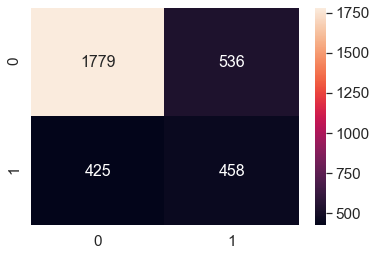

Accuracy: 0.699500
Precision: 0.460765
Recall: 0.518686
F1 score: 0.488013


In [ ]:
cnn_pred_y = model.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
import seaborn as sn

cm=confusion_matrix(y_test,cnn_pred_y.round())
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.show()


# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,cnn_pred_y.round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,cnn_pred_y.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,cnn_pred_y.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,cnn_pred_y.round())
print('F1 score: %f' % f1)


# CNN

In [ ]:
from tensorflow.keras import layers, models, optimizers

model = Sequential()
model.add(layers.Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 700, 300)          4441800   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 696, 128)          192128    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 4,635,229
Trainable params: 193,429
Non-trainable params: 4,441,800
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=40)

Epoch 1/40
210/210 [==============================] - 94s 444ms/step - loss: 0.6814 - accuracy: 0.5636 - val_loss: 0.6683 - val_accuracy: 0.5862
Epoch 2/40
210/210 [==============================] - 93s 441ms/step - loss: 0.5412 - accuracy: 0.7540 - val_loss: 0.6845 - val_accuracy: 0.5830
Epoch 3/40
210/210 [==============================] - 93s 442ms/step - loss: 0.4114 - accuracy: 0.8382 - val_loss: 0.7629 - val_accuracy: 0.5740
Epoch 4/40
210/210 [==============================] - 93s 444ms/step - loss: 0.2393 - accuracy: 0.9275 - val_loss: 0.9320 - val_accuracy: 0.5803
Epoch 5/40
210/210 [==============================] - 94s 446ms/step - loss: 0.1109 - accuracy: 0.9754 - val_loss: 1.0974 - val_accuracy: 0.5511
Epoch 6/40
210/210 [==============================] - 93s 444ms/step - loss: 0.0636 - accuracy: 0.9881 - val_loss: 1.2337 - val_accuracy: 0.5740
Epoch 7/40
210/210 [==============================] - 94s 449ms/step - loss: 0.0262 - accuracy: 0.9975 - val_loss: 1.2862 - val_ac

# CNN Metrics

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


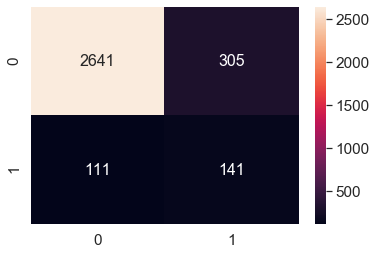

Accuracy: 0.869919
Precision: 0.316143
Recall: 0.559524
F1 score: 0.404011


In [ ]:
lstm_pred_y = model.predict(X_test)

cm=confusion_matrix(y_test,cnn_pred_y.round())
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()


# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,lstm_pred_y.round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,lstm_pred_y.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,lstm_pred_y.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,lstm_pred_y.round())
print('F1 score: %f' % f1)


In [ ]:
#!pip install stellargraph

# Graph Convolutional Networks

In [ ]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential
sys.path.append(os.path.join(os.getcwd(), "keras-deep-graph-learning")) # Adding the submodule to the module search path
sys.path.append(os.path.join(os.getcwd(), "keras-deep-graph-learning/examples")) # Adding the submodule to the module search path

In [ ]:
import stellargraph as sg
import tensorflow as tf
from keras_dgl.layers import GraphCNN

NUM_FILTERS = 1
graph_conv_filters =  A # you may try np.eye(3)
graph_conv_filters = K.constant(graph_conv_filters)

model = Sequential()
model.add(GraphCNN(Y.shape[1], NUM_FILTERS, graph_conv_filters, input_shape=(X.shape[1],), activation='elu', kernel_regularizer=l2(5e-4)))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['acc'])
model.summary()



In [29]:
# train the model on the train set
model.fit(X_train, y_train, validation_split=0.3, epochs=40)

Epoch 1/40
210/210 [==============================] - 186s 874ms/step - loss: 0.0000e+00 - accuracy: 0.4495 - val_loss: 0.0000e+00 - val_accuracy: 0.4472
Epoch 2/40
210/210 [==============================] - 183s 873ms/step - loss: 0.0000e+00 - accuracy: 0.4440 - val_loss: 0.0000e+00 - val_accuracy: 0.4472
Epoch 3/40
210/210 [==============================] - 183s 873ms/step - loss: 0.0000e+00 - accuracy: 0.4448 - val_loss: 0.0000e+00 - val_accuracy: 0.4472
Epoch 4/40
210/210 [==============================] - 185s 881ms/step - loss: 0.0000e+00 - accuracy: 0.4460 - val_loss: 0.0000e+00 - val_accuracy: 0.4472
Epoch 5/40
210/210 [==============================] - 183s 873ms/step - loss: 0.0000e+00 - accuracy: 0.4435 - val_loss: 0.0000e+00 - val_accuracy: 0.4472
Epoch 6/40
210/210 [==============================] - 183s 871ms/step - loss: 0.0000e+00 - accuracy: 0.4411 - val_loss: 0.0000e+00 - val_accuracy: 0.4472
Epoch 7/40
210/210 [==============================] - 181s 862ms/step - loss

# Graph CNN Metrics

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


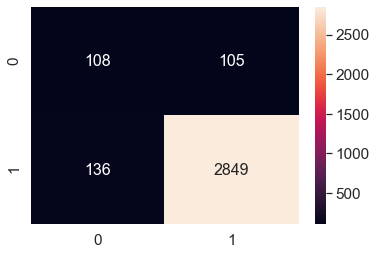

Accuracy: 0.924640
Precision: 0.964455
Recall: 0.954439
F1 score: 0.959421


In [ ]:
graph_pred_y = model.predict(X_test)

cm=confusion_matrix(y_test,cnn_pred_y.round())
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()


# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,graph_pred_y.round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,graph_pred_y.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,graph_pred_y.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,graph_pred_y.round())
print('F1 score: %f' % f1)
